# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze Phase

In this phase, we will explore the cleaned and prepared data to discover patterns, trends, and relationships.  
The goal is to extract insights that help us understand how users of non-Bellabeat smart devices behave, in order to make data-driven recommendations for Bellabeat’s products.


# Q1

### Comparison of Active Minutes and Distances by Activity Intensity

To better understand user behavior with non-Bellabeat smart devices, we compare how much time users spend and how much distance they cover across three levels of activity intensity:

- **Very Active**
- **Fairly/Moderately Active**
- **Lightly Active**

This helps identify which activity types users are most engaged in.

#### Business Relevance:
Understanding how users distribute their time and effort across different intensity levels can guide Bellabeat to:
- Recommend suitable activity plans.
- Customize push notifications for underperforming activity levels.
- Align product features (e.g., reminders, goals) with real behavior patterns.


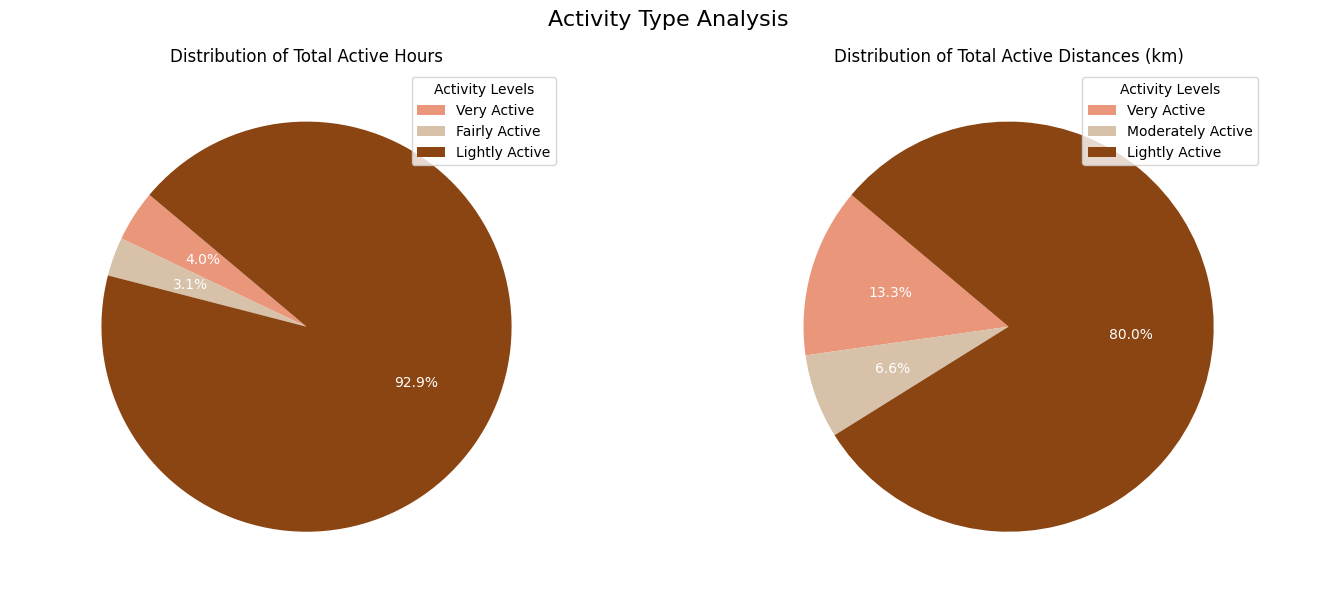

In [9]:
# Load the dataset
file_path = "final_processed_data/prepared_activity_daily_full_appended.csv"
activity_df = pd.read_csv(file_path)

# Calculate total hours from minutes
total_minutes = {
    'Very Active': activity_df['VeryActiveMinutes'].sum() / 60,
    'Fairly Active': activity_df['FairlyActiveMinutes'].sum() / 60,
    'Lightly Active': activity_df['LightlyActiveMinutes'].sum() / 60
}

# Total distances
total_distance = {
    'Very Active': activity_df['VeryActiveDistance'].sum(),
    'Moderately Active': activity_df['ModeratelyActiveDistance'].sum(),
    'Lightly Active': activity_df['LightActiveDistance'].sum()
}

# Define colors based on the presentation
colors_minutes = ['#E9967A', '#D7C1A8', '#8B4513'] 
colors_distance = ['#E9967A', '#D7C1A8', '#8B4513']  

# Create subplots for pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Activity Type Analysis", fontsize=16)

# Pie chart for activity hours with legend
axes[0].pie(
    total_minutes.values(),
    labels=total_minutes.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_minutes,
    textprops={'color': 'white'}
)
axes[0].legend(total_minutes.keys(), title="Activity Levels", loc="best")
axes[0].set_title('Distribution of Total Active Hours')

# Pie chart for activity distance with legend
axes[1].pie(
    total_distance.values(),
    labels=total_distance.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_distance,
    textprops={'color': 'white'}
)
axes[1].legend(total_distance.keys(), title="Activity Levels", loc="best")
axes[1].set_title('Distribution of Total Active Distances (km)')

plt.tight_layout()
plt.show()

# Q2

## Logged vs Tracker Distance

This comparison aims to evaluate the **difference between distances automatically recorded by smart devices (`TrackerDistance`) and those manually logged by users (`LoggedActivitiesDistance`)**.

### Why is this question important?

This analysis is not just about the values themselves—it's about understanding **user behavior** when interacting with their fitness devices.

By comparing these two metrics, we can uncover whether users:
- Rely primarily on passive (automatic) tracking.
- Regularly engage with their devices by manually logging activities.

### How does this support the business task?

The core goal of this case study is to identify **trends in user interaction with non-Bellabeat devices** to better understand their preferences.

This question directly contributes to that goal by:
- Assessing how much users interact with their wearables beyond wearing them.
- Helping Bellabeat understand whether their product strategy should focus on **automatic tracking features** vs **manual logging functionality**.
- Providing insight into the **effort level users are willing to invest** in tracking their health.

Understanding this behavior enables Bellabeat to design products that align with user expectations and streamline their experience—ultimately guiding **data-driven marketing** and **product development** strategies that cater to real usage patterns.


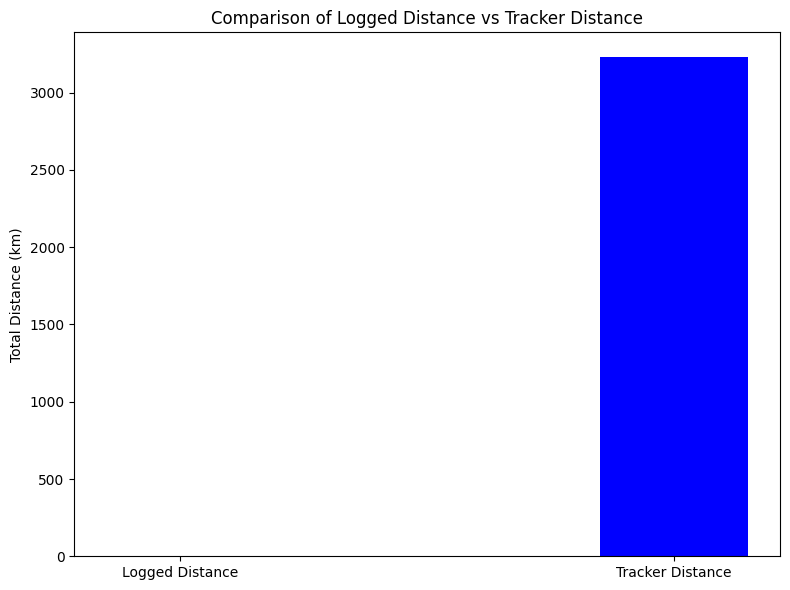

In [17]:

# Load the dataset
file_path = "final_processed_data/prepared_activity_daily_full_appended.csv"
activity_df = pd.read_csv(file_path)

# Calculate total distance for comparison
total_logged_distance = activity_df["LoggedActivitiesDistance"].sum()
total_tracker_distance = activity_df["TrackerDistance"].sum()

# Create bar chart
labels = ["Logged Distance", "Tracker Distance"]
values = [total_logged_distance, total_tracker_distance]
colors = ["orange", "blue"]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors, width=0.3)  
plt.title("Comparison of Logged Distance vs Tracker Distance")
plt.ylabel("Total Distance (km)")
plt.tight_layout()
plt.show()


# Q3

## Weekly Activity Analysis

This analysis investigates **which days of the week users are most physically active**, using two main metrics:

- **Total Steps**
- **Total Active Minutes**  
  (combined: Very, Fairly, and Lightly active minutes)

These metrics are plotted across weekdays to identify which days users move more and engage in physical activity, and which days they are more sedentary.

---

## Why is this question important?

Understanding weekly behavioral patterns is essential for uncovering usage trends of **non-Bellabeat smart devices**. Specifically, this question helps to:

- Reveal which days users are **naturally more active**, and which days show **lower engagement**.
- Reflect how people balance movement with routine  
  _(e.g., are weekends more active than weekdays?)_

---

## How does it support the business objective?

The main objective of this case study is to:

> **Analyze existing trends in the use of non-Bellabeat smart devices** (like fitness trackers and health-monitoring wearables),  
> in order to gain insights into consumer behaviors and preferences,  
> and apply those insights to **optimize Bellabeat’s products** and services.

Answering this question contributes directly by:

- **Identifying high-engagement days**, allowing Bellabeat to time:
  - promotional campaigns  
  - fitness challenges  
  - smart notifications

- **Understanding user routines** to enable:
  - personalized user experiences  
  - context-aware recommendations

- **Supporting a data-driven marketing strategy** that aligns with real user habits and preferences.


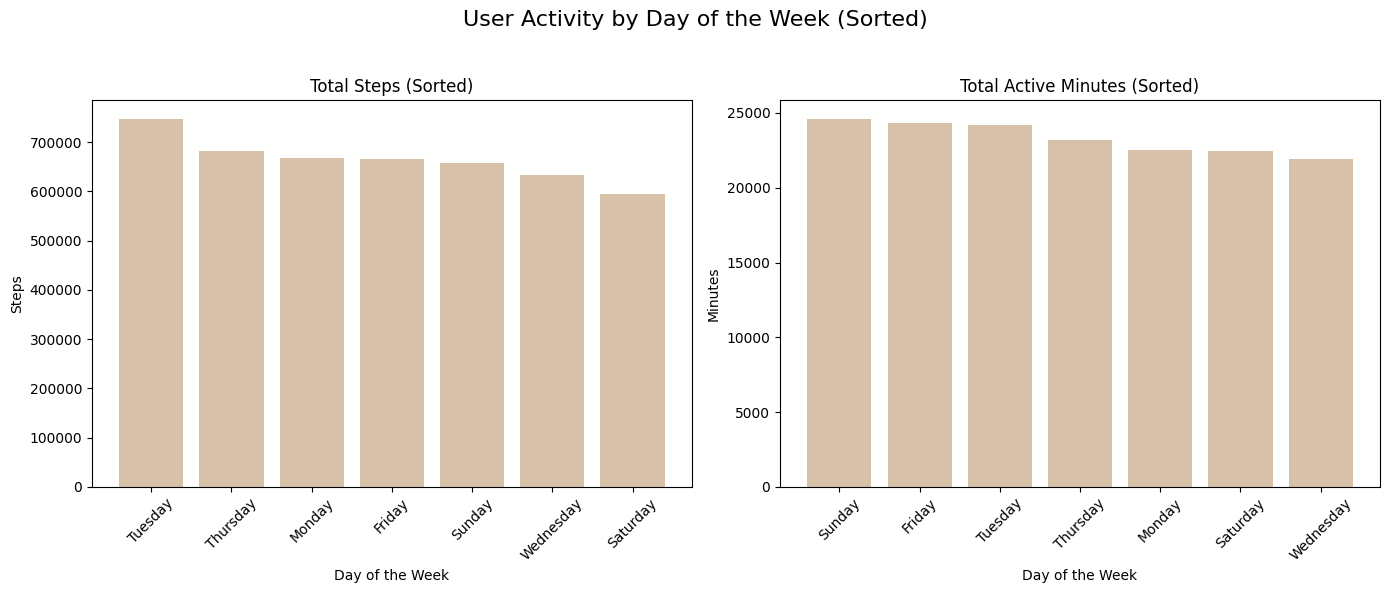

In [11]:
# Load the dataset
file_path = "final_processed_data/prepared_activity_daily_full_appended.csv"
df = pd.read_csv(file_path)

# Convert 'ActivityDate' to datetime
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Extract the weekday name
df['DayOfWeek'] = df['ActivityDate'].dt.day_name()

# Create new column for total active minutes
df['TotalActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']

# Group by weekday
weekly_summary = df.groupby('DayOfWeek')[['TotalSteps', 'TotalActiveMinutes']].sum()

# Prepare sorted versions
steps_sorted = weekly_summary.sort_values(by='TotalSteps', ascending=False)
active_sorted = weekly_summary.sort_values(by='TotalActiveMinutes', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('User Activity by Day of the Week ', fontsize=16)

# Bar chart for Total Steps (sorted)
axes[0].bar(steps_sorted.index, steps_sorted['TotalSteps'], color='#D7C1A8')
axes[0].set_title('Total Steps (Sorted)')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Steps')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for Total Active Minutes (sorted)
axes[1].bar(active_sorted.index, active_sorted['TotalActiveMinutes'], color='#D7C1A8')
axes[1].set_title('Total Active Minutes (Sorted)')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Minutes')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Q4

##  Sleep, Calories, and Activity – Correlation Heatmap

This heatmap visualizes the **correlation** between three key wellness metrics:

- `TotalMinutesAsleep` (Sleep Duration)
- `Calories` (Burned)
- `TotalDistance` (Walked)

By using only days where **both activity and sleep data** are available, we ensure reliable and complete analysis.

---

### Why is this question important?

This question explores whether users who sleep more tend to walk more or burn more calories. Understanding these relationships can help identify **healthy behavior patterns**.

---

### How does it support the business objective?

> **The objective of this case study is to analyze existing trends in the use of non-Bellabeat smart devices—such as fitness trackers and health-monitoring wearables—in order to gain insights into consumer behaviors and preferences.**

Through this question, Bellabeat can:

- Understand the **impact of sleep on physical performance**.
- Create personalized insights or recommendations based on users’ sleep and activity behavior.
- Design features that promote **balanced routines** and wellness goals.
- Use correlations to power **machine learning models** for smarter health predictions.

The correlation heatmap provides a high-level view that supports **data-driven product design and marketing decisions**.


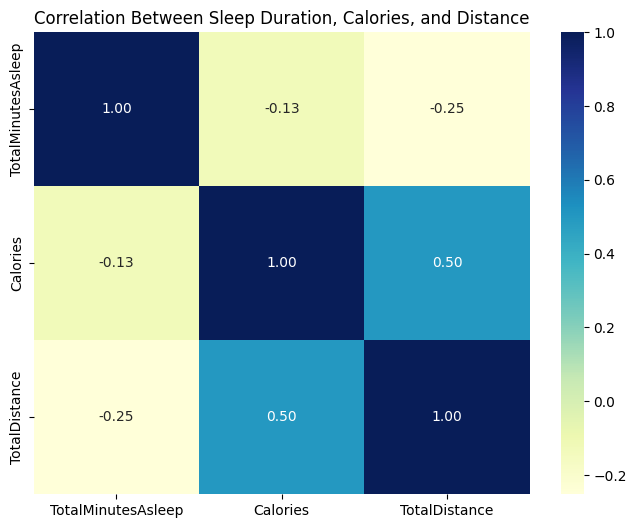

In [12]:

# Load the datasets
activity_df = pd.read_csv("final_processed_data/prepared_activity_daily_full_appended.csv")
sleep_df = pd.read_csv("final_processed_data/prepared_sleep_summary_daily_2016_v01.csv")

# Convert date columns to datetime
activity_df['ActivityDate'] = pd.to_datetime(activity_df['ActivityDate'])
sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'])

# Merge the two datasets on common date and Id
merged_df = pd.merge(activity_df, sleep_df,
                     left_on=['Id', 'ActivityDate'],
                     right_on=['Id', 'SleepDay'],
                     how='inner')  # Use only common dates

# Filter only relevant columns
heatmap_data = merged_df[['TotalMinutesAsleep', 'Calories', 'TotalDistance']]

# Compute correlation matrix
correlation = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Between Sleep Duration, Calories, and Distance")
plt.show()


# Q5

## Manual vs Automatic Weight Entries

This chart visualizes how users log their **weight data** using smart devices. It compares:

- **Manual Reported**: Entries manually entered by the user.
- **Automatic Reported**: Data automatically captured by the smart device.

---

### Why is this question important?

This question investigates **user behavior and preferences** when it comes to tracking their health metrics—specifically, whether they prefer **manual entry** or **automatic tracking** for weight data.

---

### How does this question support the business goal?

> **The objective of this case study is to analyze existing trends in the use of non-Bellabeat smart devices—such as fitness trackers and health-monitoring wearables—in order to gain insights into consumer behaviors and preferences.**

This analysis helps Bellabeat in multiple ways:

- **Understanding Behavior**: By knowing how users prefer to track their weight, Bellabeat can adapt its products to match those behaviors (e.g., prioritizing automatic syncing over manual input).
- **Product Design**: Helps inform UX/UI decisions by minimizing manual effort and promoting smart, seamless features.
- **Marketing & Promotional Campaigns**: This insight can shape campaign messaging to emphasize **“no effort, just results”**—highlighting the ease of use and intelligence of Bellabeat's devices.
- **Data-Driven Strategy**: Supports creating a **personalized experience** based on actual user trends, increasing engagement and brand satisfaction.

In summary, this question not only supports product improvement but also directly contributes to a **more effective and targeted promotional strategy** aligned with user expectations and market trends.


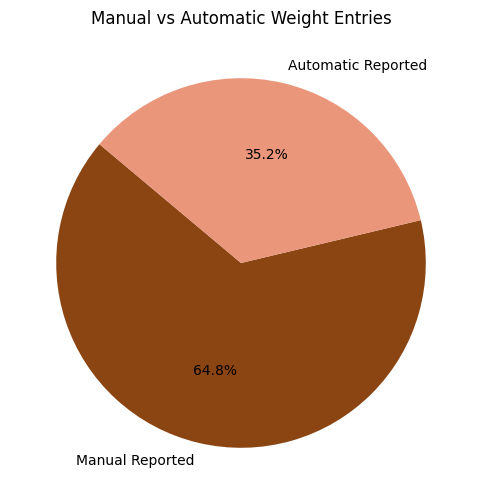

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("final_processed_data/prepared_weight_log_full_appendedv2.csv")

# Count the manual vs automatic entries
report_counts = df['IsManualReport'].value_counts()

# Rename for clarity
labels = ['Automatic Reported', 'Manual Reported'] if report_counts.index[0] == False else ['Manual Reported', 'Automatic Reported']

# Plot pie chart
colors = ['#8B4513','#E9967A']
plt.figure(figsize=(6, 6))
plt.pie(report_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Manual vs Automatic Weight Entries")
plt.show()


# Q6

##  Average Weight and BMI Analysis

This metric calculates the **average weight (in kilograms)** and **average BMI** across users.

---

###  Why is this question important?

This question helps us understand the **general health profile** of users who use non-Bellabeat smart devices. Knowing their average **body weight** and **BMI** gives context to:

- How health-conscious users are
- Whether they are in the normal, overweight, or obese BMI range
- Their potential motivation for using fitness trackers or smart health devices

---

###  How does this support the business goal?

> **The objective of this case study is to analyze existing trends in the use of non-Bellabeat smart devices in order to gain insights into consumer behaviors and preferences.**

This insight supports the goal in the following ways:

-  **Marketing Strategy**: Helps Bellabeat **personalize product messaging**. For example, if many users are overweight, campaigns can target goals like "lose weight with ease" or "track your progress effortlessly".
-  **Product Positioning**: If the target audience tends to have higher BMI, Bellabeat can emphasize **features that track weight, body fat, or BMI**.
-  **Customer Segmentation**: Understanding user health metrics allows Bellabeat to create **user personas**, enhancing both product design and promotional campaigns.

In summary, this simple metric directly supports building a **data-informed marketing strategy** that aligns with the real needs and behaviors of Bellabeat's audience.


In [14]:
import pandas as pd

# Load data
file_path = "final_processed_data/prepared_weight_log_full_appendedv2.csv"
df = pd.read_csv(file_path)

# Calculate mean weight and BMI
average_weight = df['WeightKg'].mean()
average_bmi = df['BMI'].mean()

print(f"Average Weight (Kg): {average_weight:.2f}")
print(f"Average BMI: {average_bmi:.2f}")


Average Weight (Kg): 71.06
Average BMI: 24.81


# Q7

## Hourly Trends of Activity Metrics

This chart visualizes how user activity changes throughout the day by showing hourly averages of:

- **Calories Burned**
- **Steps Taken**
- **Total Intensity**

These three key metrics are plotted across 24 hours to identify patterns in daily behavior.

---

### Why is this question important?

Understanding **what time of day users tend to move, exert effort, and burn calories** gives valuable insights into **daily behavioral patterns**. These insights are essential to:

- Identify **peak activity hours** across the day.
- Discover **sedentary periods** where engagement drops.
- Support personalized notifications or reminders based on user behavior rhythms.

---

### How does this analysis support the business objective?

> The objective of this case study is to analyze existing trends in the use of non-Bellabeat smart devices—such as fitness trackers and health-monitoring wearables—in order to gain insights into consumer behaviors and preferences.  
> These insights will then be applied to one of Bellabeat’s products to explore how the company can leverage these trends to better serve its customers.  
> The final goal is to use the identified trends to propose a data-driven marketing strategy or promotional campaign that aligns with the habits and needs of Bellabeat’s target audience.

This specific analysis helps answer the business questions in the following ways:

- **Understanding User Behavior (What, When, How)**:  
  By identifying the hours when users are most physically active, Bellabeat can better understand how users structure their days in terms of physical effort.

- **Product Optimization**:  
  Bellabeat can design features that respond to user behavior in real time. For example, if activity is low in the afternoon, the app can suggest personalized reminders or wellness breaks during that time.

- **Marketing Strategy Alignment**:  
  Campaigns and in-app challenges can be **timed to match active hours**, increasing the likelihood of engagement. For instance, sending motivational prompts right before typical peak activity hours could improve results.

In summary, this question directly contributes to a better understanding of **when users are most engaged**, allowing Bellabeat to **design smarter products and more effective campaigns** based on actual usage patterns.


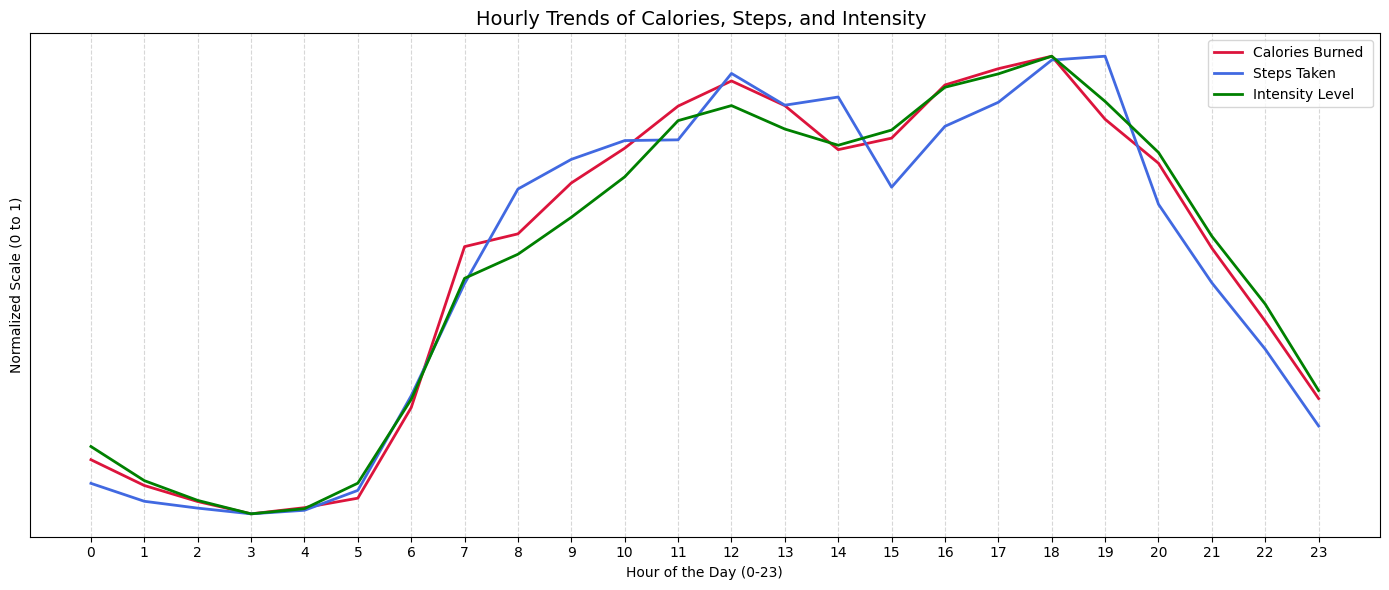

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
calories_df = pd.read_csv("final_processed_data/prepared_calories_hourly_appended.csv")
intensity_df = pd.read_csv("final_processed_data/prepared_intensity_hourly_appended.csv")
steps_df = pd.read_csv("final_processed_data/prepared_steps_hourly_appended.csv")

# Convert ActivityHour to datetime
calories_df['ActivityHour'] = pd.to_datetime(calories_df['ActivityHour'])
intensity_df['ActivityHour'] = pd.to_datetime(intensity_df['ActivityHour'])
steps_df['ActivityHour'] = pd.to_datetime(steps_df['ActivityHour'])

# Extract hour only for grouping
calories_df['Hour'] = calories_df['ActivityHour'].dt.hour
intensity_df['Hour'] = intensity_df['ActivityHour'].dt.hour
steps_df['Hour'] = steps_df['ActivityHour'].dt.hour

# Group by hour and get average values
hourly_calories = calories_df.groupby('Hour')['Calories'].mean()
hourly_intensity = intensity_df.groupby('Hour')['TotalIntensity'].mean()
hourly_steps = steps_df.groupby('Hour')['StepTotal'].mean()

# Normalize the data (Min-Max Scaling)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

normalized_calories = normalize(hourly_calories)
normalized_steps = normalize(hourly_steps)
normalized_intensity = normalize(hourly_intensity)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(normalized_calories.index, normalized_calories.values, label='Calories Burned ', color='crimson', linewidth=2)
plt.plot(normalized_steps.index, normalized_steps.values, label='Steps Taken ', color='royalblue', linewidth=2)
plt.plot(normalized_intensity.index, normalized_intensity.values, label='Intensity Level ', color='green', linewidth=2)

plt.title('Hourly Trends of Calories, Steps, and Intensity ', fontsize=14)
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Normalized Scale (0 to 1)')
plt.xticks(range(0, 24))
plt.yticks([])  # Hide Y-axis ticks
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Q8

## Heatmap of Calories Burned by Hour and Day

This heatmap visualizes the **average calories burned** per hour across the days of the week.

---

### Why is this important?

Understanding **when users burn the most calories** reveals their natural activity patterns and daily routines. This allows us to:

- Identify **peak times of physical activity** during the day and week.
- **Schedule in-app challenges** or motivational campaigns during high-engagement periods.
- **Personalize reminders or nudges** to encourage movement during typically low-activity hours.

---

### How does this support the business objectives?

> The objective of this case study is to analyze existing trends in the use of non-Bellabeat smart devices—such as fitness trackers and health-monitoring wearables—in order to gain insights into consumer behaviors and preferences.  
> These insights will then be applied to one of Bellabeat’s products to explore how the company can leverage these trends to better serve its customers.  
> The final goal is to use the identified trends to propose a data-driven marketing strategy or promotional campaign that aligns with the habits and needs of Bellabeat’s target audience.

This heatmap directly contributes to achieving all three objectives:

1. **Analyzing trends in smart device usage**:  
   It reveals **hour-by-hour behavioral patterns** related to calorie burn, which reflect user activity trends and engagement levels with their fitness devices.

2. **Improving Bellabeat products**:  
   By understanding when users are most or least active, Bellabeat can tailor its product features—such as sending activity prompts or adjusting fitness suggestions—based on real user behavior.

3. **Supporting a data-driven marketing strategy**:  
   Timing promotional campaigns to coincide with **naturally high-activity hours** increases the chance of user engagement. Likewise, targeting low-activity times with gentle nudges or incentives can improve overall user participation.

In short, this analysis enables Bellabeat to **align its product experience and marketing efforts with the real, time-based habits of its users**.


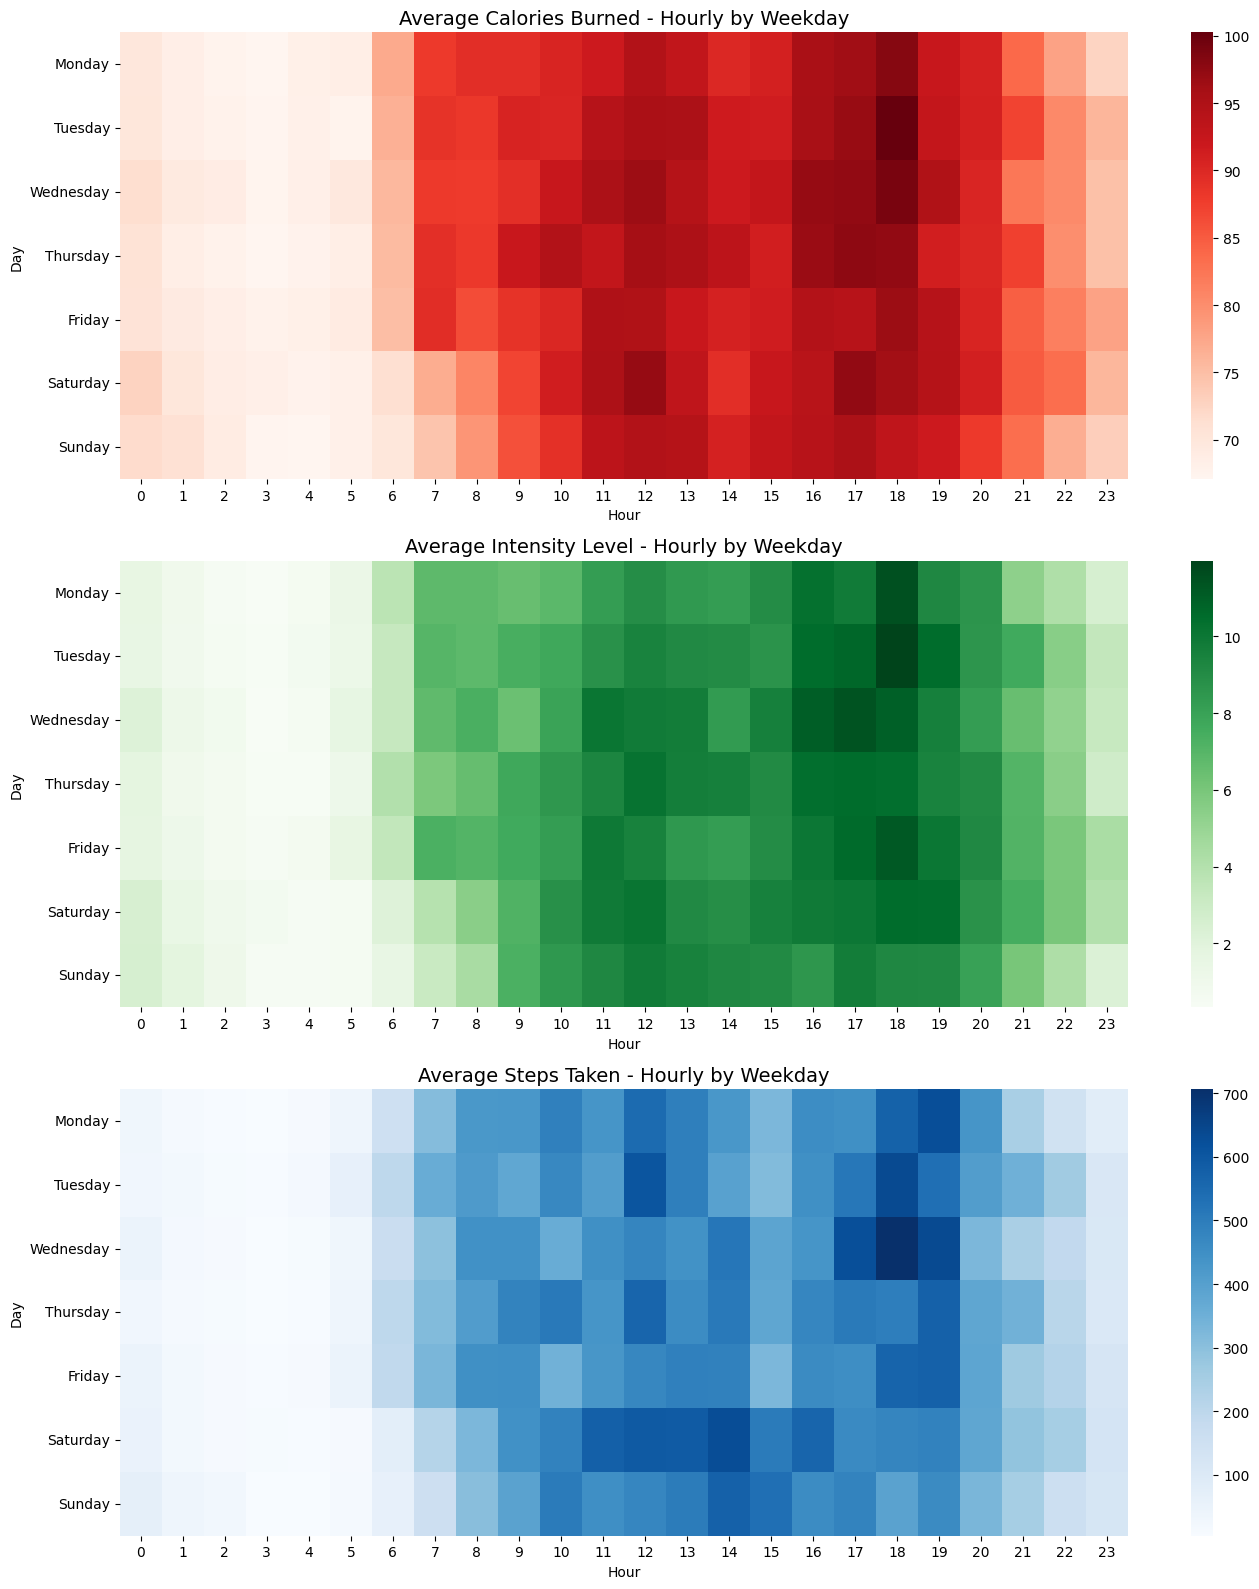

In [8]:


# Load datasets
calories = pd.read_csv("final_processed_data/prepared_calories_hourly_appended.csv")
intensity = pd.read_csv("final_processed_data/prepared_intensity_hourly_appended.csv")
steps = pd.read_csv("final_processed_data/prepared_steps_hourly_appended.csv")

# Convert 'ActivityHour' to datetime
calories['ActivityHour'] = pd.to_datetime(calories['ActivityHour'])
intensity['ActivityHour'] = pd.to_datetime(intensity['ActivityHour'])
steps['ActivityHour'] = pd.to_datetime(steps['ActivityHour'])

# Create 'Hour' and 'Day' columns
for df in [calories, intensity, steps]:
    df['Hour'] = df['ActivityHour'].dt.hour
    df['Day'] = df['ActivityHour'].dt.day_name()

# Pivot tables for heatmaps
cal_heatmap = calories.pivot_table(index='Day', columns='Hour', values='Calories', aggfunc='mean')
intensity_heatmap = intensity.pivot_table(index='Day', columns='Hour', values='TotalIntensity', aggfunc='mean')
steps_heatmap = steps.pivot_table(index='Day', columns='Hour', values='StepTotal', aggfunc='mean')

# Reorder days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cal_heatmap = cal_heatmap.reindex(order)
intensity_heatmap = intensity_heatmap.reindex(order)
steps_heatmap = steps_heatmap.reindex(order)

# Plotting all three heatmaps
fig, axs = plt.subplots(3, 1, figsize=(14, 16))

sns.heatmap(cal_heatmap, cmap="Reds", ax=axs[0])
axs[0].set_title("Average Calories Burned - Hourly by Weekday", fontsize=14)

sns.heatmap(intensity_heatmap, cmap="Greens", ax=axs[1])
axs[1].set_title("Average Intensity Level - Hourly by Weekday", fontsize=14)

sns.heatmap(steps_heatmap, cmap="Blues", ax=axs[2])
axs[2].set_title("Average Steps Taken - Hourly by Weekday", fontsize=14)

plt.tight_layout()
plt.show()
